In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk

# Load the trained NER model
nlp = spacy.load(r"C:\Users\Avdh1215\Desktop\Intellewings_assignment\Training_ner_model\ner_model")

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avdh1215\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
def fetch_html(url):
    """
    Takes a URL as input and retrieves the HTML content of the article.
    
    Args:
    url (str): The URL of the news article.

    Returns:
    str: The HTML content of the article.
    """
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Return the HTML content
            return soup
        else:
            print(f"Failed to retrieve the article. HTTP Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def extract_entities(text):
    """
    Extracts named entities from the given text using the NER model.
    
    Args:
    text (str): The text to extract entities from.

    Returns:
    dict: A dictionary containing lists of 'PERSON' and 'ORG' entities.
    """
    doc = nlp(text)
    entities = {"PERSON": [], "ORG": []}
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
            
    return entities


def analyze_sentiment_vader(text):
    """
    Analyzes the sentiment of the given text using VADER.
    
    Args:
    text (str): The text to analyze.

    Returns:
    str: The sentiment of the text ('positive', 'negative', 'neutral').
    """
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


def analyze_sentiment_textblob(text):
    """
    Analyzes the sentiment of the given text using TextBlob.
    
    Args:
    text (str): The text to analyze.

    Returns:
    str: The sentiment of the text ('positive', 'negative', 'neutral').
    """
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'


def truncate_text(text, word_limit=511):
    """
    Truncates the text to a specified word limit.
    
    Args:
    text (str): The text to truncate.
    word_limit (int): The maximum number of words to include in the truncated text.

    Returns:
    str: The truncated text.
    """
    return ' '.join(text.split()[:word_limit])


Successfully retrieved the article's HTML content.
                                                 URL  \
0  https://economictimes.indiatimes.com/news/inte...   

                                        HTML_Content  \
0  <!DOCTYPE html>\n<html class="no-js" lang="en"...   

                                    Extracted_PERSON  \
0  ['Benchmarks Nifty', 'Fund Direct', 'News Engl...   

                                       Extracted_ORG Sentiment_VADER  \
0  ['Inflation', 'Here', 'FUNDS', 'Growt', 'FUNDS...        positive   

  Sentiment_TextBlob         Date_Fetched  
0           positive  2024-12-16 02:21:10  


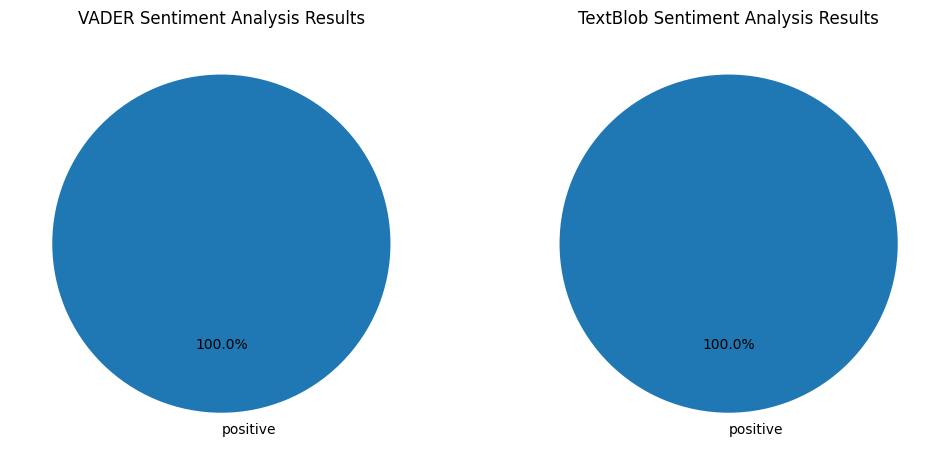

In [38]:
# Example usage
if __name__ == "__main__":
    # Take a URL input
    article_url = input("Enter the news article URL: ")
    
    # Fetch the HTML content
    html_content = fetch_html(article_url)
    
    if html_content:
        print("Successfully retrieved the article's HTML content.")
        
        # Extract text content from HTML
        article_text = html_content.get_text(separator=' ', strip=True)
        
        # Truncate the text to the first 511 words
        article_text = truncate_text(article_text)
        
        # Extract entities from the article text
        entities = extract_entities(article_text)
        
        # Analyze sentiment of the article text using different models
        sentiment_vader = analyze_sentiment_vader(article_text)
        sentiment_textblob = analyze_sentiment_textblob(article_text)
        
        # Prepare the data to be saved (including the URL, HTML content, extracted entities, and sentiment)
        article_data = {
            "URL": article_url,
            "HTML_Content": str(html_content.prettify()),
            "Extracted_PERSON": str(entities["PERSON"]),
            "Extracted_ORG": str(entities["ORG"]),
            "Sentiment_VADER": sentiment_vader,
            "Sentiment_TextBlob": sentiment_textblob,
            "Date_Fetched": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

        # Create a DataFrame
        df = pd.DataFrame([article_data])
        print(df)

        # Plot the sentiment results in separate pie charts
        sentiments_vader = [sentiment_vader]
        sentiments_textblob = [sentiment_textblob]
        
        sentiment_counts_vader = pd.Series(sentiments_vader).value_counts()
        sentiment_counts_textblob = pd.Series(sentiments_textblob).value_counts()

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Plot VADER results
        sentiment_counts_vader.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
        axes[0].set_title("VADER Sentiment Analysis Results")
        axes[0].set_ylabel('')

        # Plot TextBlob results
        sentiment_counts_textblob.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90)
        axes[1].set_title("TextBlob Sentiment Analysis Results")
        axes[1].set_ylabel('')

        plt.show()
    else:
        print("Failed to retrieve article content.")


In [32]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import spacy
from transformers import LongformerTokenizer, LongformerForSequenceClassification
import torch
import matplotlib.pyplot as plt

# Load the trained NER model
nlp = spacy.load(r"C:\Users\Avdh1215\Desktop\Intellewings_assignment\Training_ner_model\ner_model")

# Initialize Longformer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096')

# Set model to evaluation mode
model.eval()


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LongformerForSequenceClassification(
  (longformer): LongformerModel(
    (embeddings): LongformerEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(4098, 768, padding_idx=1)
    )
    (encoder): LongformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x LongformerLayer(
          (attention): LongformerAttention(
            (self): LongformerSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (query_global): Linear(in_features=768, out_features=768, bias=True)
              (key_global): Linear(in_features=768, out_features=768, bias=True)
          

In [41]:
def fetch_html(url):
    """
    Takes a URL as input and retrieves the HTML content of the article.
    
    Args:
    url (str): The URL of the news article.

    Returns:
    str: The HTML content of the article.
    """
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Return the HTML content
            return soup
        else:
            print(f"Failed to retrieve the article. HTTP Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def extract_entities(text):
    """
    Extracts named entities from the given text using the NER model.
    
    Args:
    text (str): The text to extract entities from.

    Returns:
    dict: A dictionary containing lists of 'PERSON' and 'ORG' entities.
    """
    doc = nlp(text)
    entities = {"PERSON": [], "ORG": []}
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
            
    return entities


def analyze_sentiment_longformer(text):
    """
    Analyzes the sentiment of the given text using Longformer.
    
    Args:
    text (str): The text to analyze.

    Returns:
    str: The sentiment of the text ('positive', 'negative', 'neutral').
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=4096)
    outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()

    if sentiment == 0:
        return 'negative'
    elif sentiment == 1:
        return 'neutral'
    else:
        return 'positive'


Successfully retrieved the article's HTML content.


Initializing global attention on CLS token...


                                                 URL  \
0  https://economictimes.indiatimes.com/news/inte...   

                                        HTML_Content  \
0  <!DOCTYPE html>\n<html class="no-js" lang="en"...   

                                    Extracted_PERSON  \
0  ['Benchmarks Nifty', 'Fund Direct', 'News Engl...   

                                       Extracted_ORG Sentiment_Longformer  \
0  ['Inflation', 'Here', 'FUNDS', 'Growt', 'FUNDS...             negative   

          Date_Fetched  
0  2024-12-16 02:22:23  


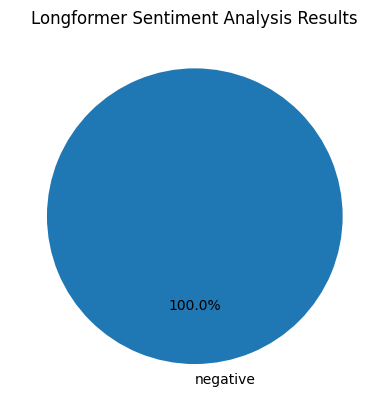

In [42]:
# Example usage
if __name__ == "__main__":
    # Take a URL input
    article_url = input("Enter the news article URL: ")
    
    # Fetch the HTML content
    html_content = fetch_html(article_url)
    
    if html_content:
        print("Successfully retrieved the article's HTML content.")
        
        # Extract text content from HTML
        article_text = html_content.get_text(separator=' ', strip=True)
        
        # Extract entities from the article text
        entities = extract_entities(article_text)
        
        # Analyze sentiment of the article text using Longformer
        sentiment_longformer = analyze_sentiment_longformer(article_text)
        
        # Prepare the data to be saved (including the URL, HTML content, extracted entities, and sentiment)
        article_data = {
            "URL": article_url,
            "HTML_Content": str(html_content.prettify()),
            "Extracted_PERSON": str(entities["PERSON"]),
            "Extracted_ORG": str(entities["ORG"]),
            "Sentiment_Longformer": sentiment_longformer,
            "Date_Fetched": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

        # Create a DataFrame
        df = pd.DataFrame([article_data])
        print(df)

        # Plot the sentiment results in a pie chart
        sentiments = [sentiment_longformer]
        sentiment_counts = pd.Series(sentiments).value_counts()

        # Plot the pie chart
        sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title("Longformer Sentiment Analysis Results")
        plt.ylabel('')
        plt.show()
    else:
        print("Failed to retrieve article content.")


In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import spacy
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import pipeline
import matplotlib.pyplot as plt
import nltk

# Load the trained NER model
nlp = spacy.load("en_core_web_sm")

# Initialize DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Initialize Hugging Face's sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


c:\Users\Avdh1215\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Avdh1215\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Avdh1215\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingfa

In [44]:
def fetch_html(url):
    """
    Takes a URL as input and retrieves the HTML content of the article.
    
    Args:
    url (str): The URL of the news article.

    Returns:
    str: The HTML content of the article.
    """
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Return the HTML content
            return soup
        else:
            print(f"Failed to retrieve the article. HTTP Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def extract_entities(text):
    """
    Extracts named entities from the given text using the NER model.
    
    Args:
    text (str): The text to extract entities from.

    Returns:
    dict: A dictionary containing lists of 'PERSON' and 'ORG' entities.
    """
    doc = nlp(text)
    entities = {"PERSON": [], "ORG": []}
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
             
    return entities


def analyze_sentiment_distilbert(text):
    """
    Analyzes the sentiment of the given text using DistilBERT.
    
    Args:
    text (str): The text to analyze.

    Returns:
    str: The sentiment of the text ('POSITIVE', 'NEGATIVE').
    """
    result = sentiment_pipeline(text[:2000])[0]  # Limiting to 512 tokens to avoid exceeding model limit
    return result['label']


Successfully retrieved the article's HTML content.
                                                 URL  \
0  https://indianexpress.com/article/explained/ex...   

                                        HTML_Content  \
0  <!DOCTYPE html>\n<html lang="en" xmlns:fb="htt...   

                                    Extracted_PERSON  \
0  ['Eklavya', 'Sections English', 'Opens', 'Shor...   

                                       Extracted_ORG Sentiment_DistilBERT  \
0  ['Edition India International', 'ePaper', 'ePa...             NEGATIVE   

          Date_Fetched  
0  2024-12-16 02:25:07  


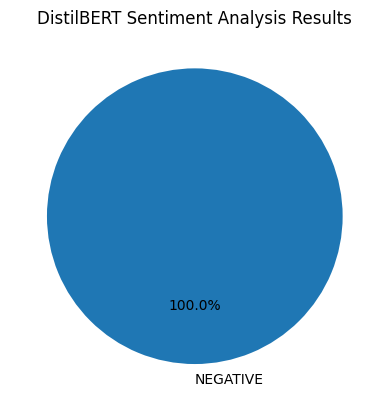

In [46]:
# Example usage
if __name__ == "__main__":
    # Take a URL input
    article_url = input("Enter the news article URL: ")
    
    # Fetch the HTML content
    html_content = fetch_html(article_url)
    
    if html_content:
        print("Successfully retrieved the article's HTML content.")
        
        # Extract text content from HTML
        article_text = html_content.get_text(separator=' ', strip=True)
        
        # Extract entities from the article text
        entities = extract_entities(article_text)
        
        # Analyze sentiment of the article text using DistilBERT
        sentiment_distilbert = analyze_sentiment_distilbert(article_text)
        
        # Prepare the data to be saved (including the URL, HTML content, extracted entities, and sentiment)
        article_data = {
            "URL": article_url,
            "HTML_Content": str(html_content.prettify()),
            "Extracted_PERSON": str(entities["PERSON"]),
            "Extracted_ORG": str(entities["ORG"]),
            "Sentiment_DistilBERT": sentiment_distilbert,
            "Date_Fetched": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

        # Create a DataFrame
        df = pd.DataFrame([article_data])
        print(df)

        # Plot the sentiment results in a pie chart
        sentiments = [sentiment_distilbert]
        sentiment_counts = pd.Series(sentiments).value_counts()

        # Plot the pie chart
        sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title("DistilBERT Sentiment Analysis Results")
        plt.ylabel('')
        plt.show()
    else:
        print("Failed to retrieve article content.")


In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import spacy
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import pipeline
import matplotlib.pyplot as plt
import nltk

# Load the trained NER model
nlp = spacy.load("en_core_web_sm")

# Initialize DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Initialize Hugging Face's sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


Device set to use cpu


In [48]:
def fetch_html(url):
    """
    Takes a URL as input and retrieves the HTML content of the article.
    
    Args:
    url (str): The URL of the news article.

    Returns:
    str: The HTML content of the article.
    """
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Return the HTML content
            return soup
        else:
            print(f"Failed to retrieve the article. HTTP Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def extract_entities(text):
    """
    Extracts named entities from the given text using the NER model.
    
    Args:
    text (str): The text to extract entities from.

    Returns:
    dict: A dictionary containing lists of 'PERSON' and 'ORG' entities.
    """
    doc = nlp(text)
    entities = {"PERSON": [], "ORG": []}
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
             
    return entities


def analyze_sentiment_distilbert(text):
    """
    Analyzes the sentiment of the given text using DistilBERT.
    
    Args:
    text (str): The text to analyze.

    Returns:
    dict: A dictionary with counts of 'POSITIVE' and 'NEGATIVE' sentiments.
    """
    # Split the text into chunks
    chunk_size = 512
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
    
    sentiments = {"POSITIVE": 0, "NEGATIVE": 0}
    for chunk in chunks:
        result = sentiment_pipeline(chunk)[0]
        sentiments[result['label']] += 1
    
    return sentiments


Successfully retrieved the article's HTML content.
                                                 URL  \
0  https://economictimes.indiatimes.com/news/inte...   

                                        HTML_Content  \
0  <!DOCTYPE html>\n<html class="no-js" lang="en"...   

                                    Extracted_PERSON  \
0  ['brady', 'ePaper My Watchlist Subscribe Sign'...   

                                       Extracted_ORG  Sentiment_POSITIVE  \
0  ['The Brutalist: See', 'UK News US News UAE Sa...                  13   

   Sentiment_NEGATIVE         Date_Fetched  
0                  19  2024-12-16 02:28:53  


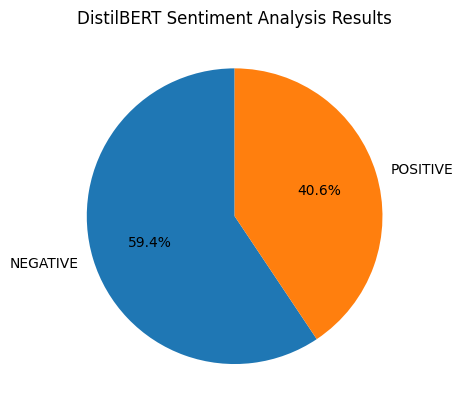

In [49]:
# Example usage
if __name__ == "__main__":
    # Take a URL input
    article_url = input("Enter the news article URL: ")
    
    # Fetch the HTML content
    html_content = fetch_html(article_url)
    
    if html_content:
        print("Successfully retrieved the article's HTML content.")
        
        # Extract text content from HTML
        article_text = html_content.get_text(separator=' ', strip=True)
        
        # Extract entities from the article text
        entities = extract_entities(article_text)
        
        # Analyze sentiment of the article text using DistilBERT
        sentiment_distilbert = analyze_sentiment_distilbert(article_text)
        
        # Prepare the data to be saved (including the URL, HTML content, extracted entities, and sentiment)
        article_data = {
            "URL": article_url,
            "HTML_Content": str(html_content.prettify()),
            "Extracted_PERSON": str(entities["PERSON"]),
            "Extracted_ORG": str(entities["ORG"]),
            "Sentiment_POSITIVE": sentiment_distilbert["POSITIVE"],
            "Sentiment_NEGATIVE": sentiment_distilbert["NEGATIVE"],
            "Date_Fetched": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

        # Create a DataFrame
        df = pd.DataFrame([article_data])
        print(df)

        # Plot the sentiment results in a pie chart
        sentiments = ["POSITIVE"] * sentiment_distilbert["POSITIVE"] + ["NEGATIVE"] * sentiment_distilbert["NEGATIVE"]
        sentiment_counts = pd.Series(sentiments).value_counts()

        # Plot the pie chart
        sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title("DistilBERT Sentiment Analysis Results")
        plt.ylabel('')
        plt.show()
    else:
        print("Failed to retrieve article content.")


In [50]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import spacy
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import pipeline
import matplotlib.pyplot as plt
import nltk

# Load the trained NER model
nlp = spacy.load(r"C:\Users\Avdh1215\Desktop\Intellewings_assignment\Training_ner_model\ner_model")

# Initialize DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Initialize Hugging Face's sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


Device set to use cpu


In [51]:
def fetch_html(url):
    """
    Takes a URL as input and retrieves the HTML content of the article.
    
    Args:
    url (str): The URL of the news article.

    Returns:
    str: The HTML content of the article.
    """
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Return the HTML content
            return soup
        else:
            print(f"Failed to retrieve the article. HTTP Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def extract_entities(text):
    """
    Extracts named entities from the given text using the NER model.
    
    Args:
    text (str): The text to extract entities from.

    Returns:
    dict: A dictionary containing lists of 'PERSON' and 'ORG' entities.
    """
    doc = nlp(text)
    entities = {"PERSON": [], "ORG": []}
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
             
    return entities


def analyze_sentiment_distilbert(text):
    """
    Analyzes the sentiment of the given text using DistilBERT.
    
    Args:
    text (str): The text to analyze.

    Returns:
    dict: A dictionary with counts of 'POSITIVE' and 'NEGATIVE' sentiments.
    """
    # Split the text into chunks
    chunk_size = 512
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
    
    sentiments = {"POSITIVE": 0, "NEGATIVE": 0}
    for chunk in chunks:
        result = sentiment_pipeline(chunk)[0]
        sentiments[result['label']] += 1
    
    return sentiments


Successfully retrieved the article's HTML content.
                                                 URL  \
0  https://economictimes.indiatimes.com/news/inte...   

                                        HTML_Content  \
0  <!DOCTYPE html>\n<html class="no-js" lang="en"...   

                                    Extracted_PERSON  \
0  ['Benchmarks Nifty', 'Fund Direct', 'News Engl...   

                                       Extracted_ORG  Sentiment_POSITIVE  \
0  ['FUNDS', 'Growt', 'FUNDS', 'Canara', 'Equity'...                  13   

   Sentiment_NEGATIVE         Date_Fetched  
0                  19  2024-12-16 02:30:14  


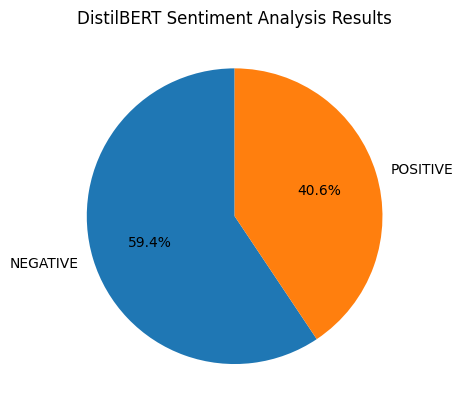

In [52]:
# Example usage
if __name__ == "__main__":
    # Take a URL input
    article_url = input("Enter the news article URL: ")
    
    # Fetch the HTML content
    html_content = fetch_html(article_url)
    
    if html_content:
        print("Successfully retrieved the article's HTML content.")
        
        # Extract text content from HTML
        article_text = html_content.get_text(separator=' ', strip=True)
        
        # Extract entities from the article text
        entities = extract_entities(article_text)
        
        # Analyze sentiment of the article text using DistilBERT
        sentiment_distilbert = analyze_sentiment_distilbert(article_text)
        
        # Prepare the data to be saved (including the URL, HTML content, extracted entities, and sentiment)
        article_data = {
            "URL": article_url,
            "HTML_Content": str(html_content.prettify()),
            "Extracted_PERSON": str(entities["PERSON"]),
            "Extracted_ORG": str(entities["ORG"]),
            "Sentiment_POSITIVE": sentiment_distilbert["POSITIVE"],
            "Sentiment_NEGATIVE": sentiment_distilbert["NEGATIVE"],
            "Date_Fetched": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

        # Create a DataFrame
        df = pd.DataFrame([article_data])
        print(df)

        # Plot the sentiment results in a pie chart
        sentiments = ["POSITIVE"] * sentiment_distilbert["POSITIVE"] + ["NEGATIVE"] * sentiment_distilbert["NEGATIVE"]
        sentiment_counts = pd.Series(sentiments).value_counts()

        # Plot the pie chart
        sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title("DistilBERT Sentiment Analysis Results")
        plt.ylabel('')
        plt.show()
    else:
        print("Failed to retrieve article content.")
